Вариант №6

Лабораторная работа №1. Многослойная нейронная сеть

Задача №1 - 6 вариант

Задача №2 - 2 вариант

Задача №3 - 4 вариант

In [1]:
import numpy as np

Задача №1 - 6 вариант

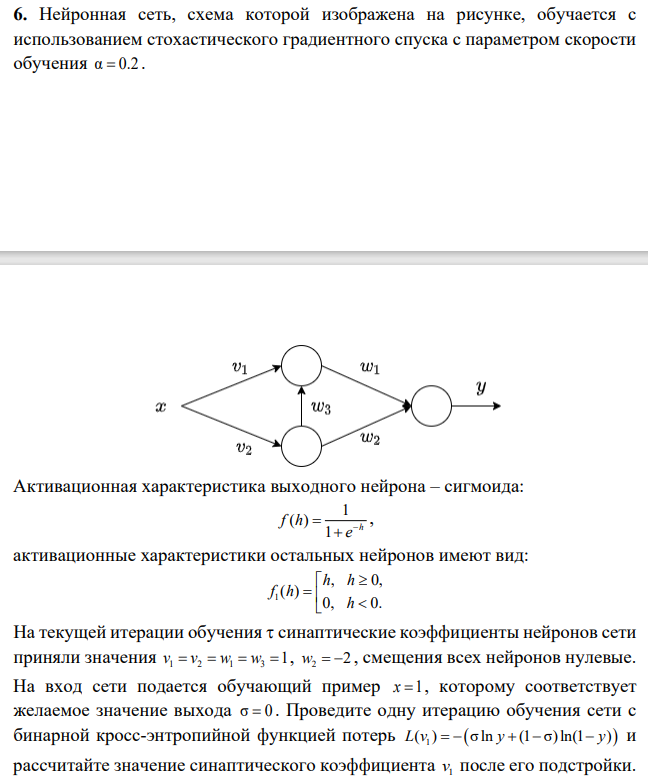

Синаптические коэффициенты:
$$
w_2 = -2,
$$
$$
v_1 = v_2 = w_1 = w_3 = 1
$$

Смещение всех нейронов равно нулю.
На вход подается обучающий пример $$ x = 1 $$
Скорость обучения $$ α=0,2 $$
Желаемое значение выхода $$ σ = 0 $$

## 1) Вычисляем выходы нейронов первого уровня $y_1$ и $y_2$:
Сначала вычисляем значения на скрытых нейронах:
$$ y_1 = x * v_1 + y_2 * w_3 = 1*1 + 1*1 = 2 $$
$$ y_2 = x * v_2 = 1*1 = 1 $$

## 2) Вычисляем значения на выходных нейронах:
$$ h = y_1*w_1 + y_2*w_2 = 2+(-2) = 0 $$

Теперь применим сигмоидальную функцию активации:

$$
y = \frac{1}{1 + e^{-h}} = \frac{1}{1 + e^0} = \frac{1}{2} = 0.5
$$

## 3) Вычисление функции потерь $L$:
Функция потерь задается как:
$$
L = -[\sigma \ln(y) + (1 - \sigma) \ln(1 - y)]
$$

Подставляем желаемое значение выхода $ σ=0 $

$$ L = -\ln(1 - y) = -\ln(1 - 0.5) = -\ln(0.5) = \ln(2) \approx 0.693 $$

## 4) Вычисление градиента функции потерь $\frac{\partial L}{\partial v_1}$:
### 1. Градиент по выходу $y$:
$$
\frac{\partial L}{\partial y} = -\frac{\sigma}{y} + \frac{1 - \sigma}{1 - y} = \frac{1}{1 - 0.5} = 2
$$
### 2. Градиент выхода по активации $h: \frac{\partial y}{\partial h}$ — так как активация выходного нейрона сигмоидальная, мы можем использовать:
$$
\frac{\partial y}{\partial h} = y \cdot (1 - y) = 0.5 \cdot (1 - 0.5) = 0.25
$$
### 3. Градиент по $v_1$: Мы знаем, что:
$$ \frac{\partial h}{\partial v_1} = x = 1 $$
Тогда градиент функции потерь по $v_1$ вычисляется как:
$$ \frac{\partial L}{\partial v_1} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h} \cdot \frac{\partial h}{\partial v_1} = 2*0,25*1 = 0,5$$

## 5) Обновление значения $v_1$:
Теперь, используя скорость обучения $α=0,2$:
$$ v_1^{\text{new}} = v_1^{\text{old}} - \alpha \cdot \frac{\partial L}{\partial v_1} = 1 - 0,2*0,5 = 0,9$$

После одной итерации обучения с учетом заданных значений, новое значение синаптического коэффициента $v_1^{\text{new}}$ равно 0.9


In [4]:
# Задаем параметры
v1 = 1
v2 = 1
w1 = 1
w2 = -2
w3 = 1
alpha = 0.2
sigma = 0
x = 1

# Вычисляем значения y1, y2 и y3
y2 = x * v2
y1 = x * v1 + y2 * w3

# Вычисляем выход сети y
h = y1 * w1 + y2 * w2
y = 1 / (1 + np.exp(-h))

# Функция потерь
L = - (sigma * np.log(y) + (1 - sigma) * np.log(1 - y))

# Вычисляем градиент функции потерь по y
dL_dy = 1 / (1 - y)

# Вычисляем градиент y по h
dy_dh = y * (1 - y)

# Градиент функции потерь по v1
dh_dv1 = x
dL_dv1 = dL_dy * dy_dh * dh_dv1

# Обновляем значение v1
v1_new = v1 - alpha * dL_dv1

print(f"Новое значение синаптического коэффициента v1: {v1_new}")

Новое значение синаптического коэффициента v1: 0.9


Задача №2 - 2 вариант

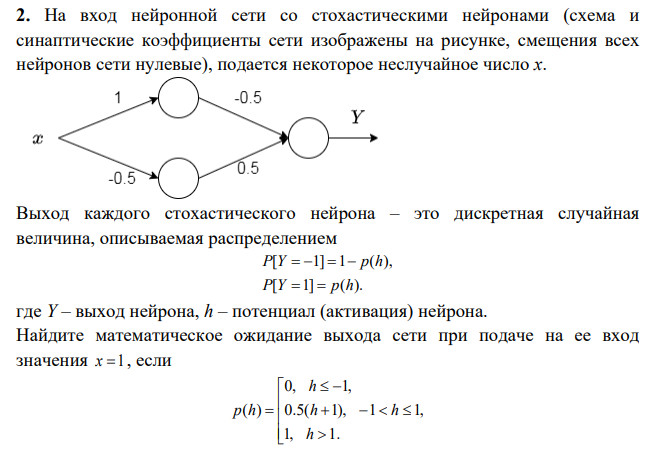

Синаптические коэффициенты:
$$
v_1 = 1,
v_2 = -0,5
$$
$$
w_1 = -0,5,
w_2 = 0,5
$$
На вход подается $x = 1$

## 1) Вычисление активаций нейронов
Для первого нейрона: $h_1 = v_1*x = 1$

Для второго нейрона: $h_2 = v_2*x = -0,5$

Для выходного нейрона: $h = h_1*w_1 + h_2*w_2 = -0,5 - 0,25 = -0,75$

## 2) Вероятности выхода нейронов
1. Для первого нейрона $h_1 = 1$, следовательно применим $0.5(h+1)$:
$$ p(h_1) = 0,5*(0,5+1) = 1 $$
$$ P[Y = 0] = 1 - p(h_1) = 0 $$
$$ P[Y = 1] = p(h_1) = 1 $$
2. Для второго нейрона $h_2 = -0.5$, следовательно применим $0.5(h+1)$:
$$ p(h_1) = 0,5*(-0,5+1) = 0,25 $$
$$ P[Y = 0] = 1 - p(h_1) = 0,75 $$
$$ P[Y = 1] = p(h_1) = 0,25 $$
3. Для выходного нейрона $h = -0.75$, следовательно применим $0.5(h+1)$:
$$ p(h_1) = 0,5*(-0,75+1) = 0,125 $$
$$ P[Y = 0] = 1 - p(h_1) = 0,875 $$
$$ P[Y = 1] = p(h_1) = 0,125 $$

## 3) Математическое ожидание выхода сети
$$ E[Y] = 2p(h) - 1 $$
1. Для первого нейрона:
$$ E[Y_1] = 2*1 - 1 = 1 $$
2. Для второго нейрона:
$$ E[Y_2] = 2*0,25 - 1 = -0,5 $$
3. Для выходного нейрона:
$$ E[Y] = 2*0,125 - 1 = -0,75 $$

Математическое ожидание выхода сети = -0,75


In [8]:
# Задаем параметры
x = 1
v1 = 1
v2 = -0.5
w1 = -0.5
w2 = 0.5

# Функция для вычисления активации нейронов
def p(h):
    if h <= -1:
        return 0
    elif -1 < h <= 1:
        return 0.5 * (h + 1)
    else:
        return 1

# Вычисление активаций нейронов
h1 = x * v1
h2 = x * v2
h = h1 * w1 + h2 * w2

# Применение функции активации для каждого нейрона
p_h1 = p(h1)
p_h2 = p(h2)
p_h = p(h)

# Вывод вероятностей выхода
def P(y, h):
  if y == 0:
    return 1 - p(h)
  else:
    return p(h)


P_Y0_h1 = P(0, h1)
P_Y1_h1 = P(1, h1)

P_Y0_h2 = P(0, h2)
P_Y1_h2 = P(1, h2)

P_Y0_h = P(0, h)
P_Y1_h = P(1, h)

# Вычисление математического ожидания выхода сети
E_Y1 = 2 * p(h1) - 1
E_Y2 = 2 * p(h2) - 1
E_Y = 2 * p(h) - 1

print(f"Новое значение синаптического коэффициента E[Y]: {E_Y}")

Новое значение синаптического коэффициента E[Y]: -0.75


Задача №3 - 4 вариант

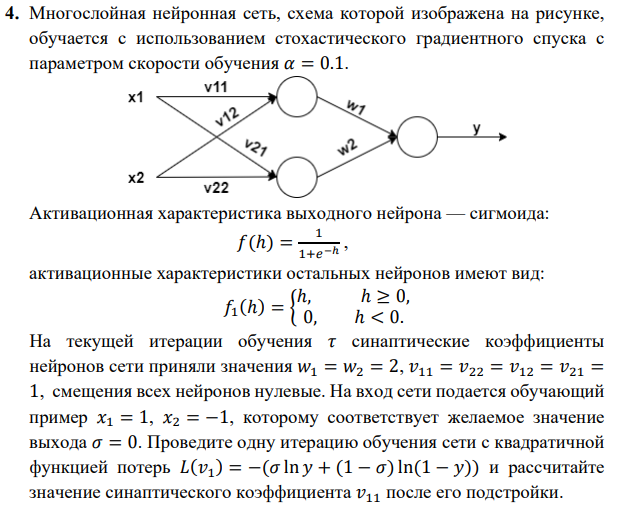

Синаптические коэффициенты:
$$
w_1 = w_2 = 2,
$$
$$
v_{11} = v_{22} = v_{12} = v_{21} = 1
$$

Смещение всех нейронов равно нулю.
На вход подается обучающий пример $$ x_1 = 1 $$ $$ x_2 = -1 $$
Желаемое значение выхода $$ σ = 0 $$

## 1) Вычисляем выходы нейронов первого уровня $y_1$ и $y_2$:
Сначала вычисляем значения на скрытых нейронах:
$$ h_1 = x_1 * v_{11} + x_2 * v_{12} = 1*1 + (-1)*1= 0 $$
$$ y_1 = h_1 $$, так как $h_1 >= 0$
$$ h_2 = x_2 * v_{22} + x_1 * v_{21} = (-1)*1 + 1*1 = 0 $$
$$ y_2 = h_2 $$, так как $h_2 >= 0$

## 2) Вычисляем значения на выходных нейронах:
$$ y = y_1 * w_1 + y_2 * w_2 = 0 $$

Так как функция активации данных нейронов сигмоидальная, то значение на выходе примет следующий вид:

$$
y = \frac{1}{1 + e^{-h}} = \frac{1}{1 + e^{0}} = 0.5
$$

## 3) Вычисление функции потерь $L$:
Функция потерь задается как:
$$ L = -[\sigma \cdot \ln(y) + (1 - \sigma) \cdot \ln(1 - y)] $$

Подставляем желаемое значение выхода $ σ=0 $

$$ L = -\ln(1 - y) = -\ln(1 - 0.5) = -\ln(0.5) = \ln(2) \approx 0.693 $$

## 4) Вычисление градиента функции потерь $\frac{\partial L}{\partial y} = -\frac{\sigma}{y} + \frac{1 - \sigma}{1 - y}$:
### 1. Градиент по выходу $y_1$:
$$ \frac{\partial L}{\partial y} = \frac{1}{1 - y} = \frac{1}{1 - 0.5} = 2 $$
Градиент по весам $w_1$ и $w_2$:
$$ \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y} ⋅ y_1 = 0 $$
$$ \frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial y} ⋅ y_2 = 0 $$
### 2. Градиент выхода по активации $h_1: \frac{\partial y_1}{\partial h_1}$ — так как активация выходного нейрона линейная, мы можем использовать:
$$ \frac{\partial y_1}{\partial h_1} = y \cdot (1 - y) = 0.5 \cdot (1 - 0.5) = 0.25 $$
### 3. Градиент по $v_{11}$: Мы знаем, что:
$$ \frac{\partial h_1}{\partial v_{11}} = x_1 = 1 $$
Тогда градиент функции потерь по $v_1$ вычисляется как:
$$ \frac{\partial L}{\partial v_{11}} = \frac{\partial L}{\partial y_1} \cdot \frac{\partial y_1}{\partial h_1} \cdot \frac{\partial h_1}{\partial v_{11}} = 2*0,25*1 = 0,5$$

## 5) Обновление значения $v_1$:
Теперь, используя скорость обучения $α=0,1$:
$$ v_{11}^{\text{new}} = v_{11}^{\text{old}} - \alpha \cdot \frac{\partial L}{\partial v_{11}} = 2 - 0,1*0,5 = 0,95$$

После одной итерации обучения с учетом заданных значений, новое значение синаптического коэффициента $v_{11}^{\text{new}}$ равно 0,95

In [13]:
# Задаем параметры
v11 = 1
v12 = 1
v21 = 1
v22 = 1
w1 = 2
w2 = 2
alpha = 0.1
sigma = 0
x1 = 1
x2 = -1

# Вычисляем значения y1, y2
h1 = x1 * v11 + x2 * v12
h2 = x2 * v22 + x1 * v21

def y(h):
  if h >= 0:
    return h
  else:
    return -h

y1 = y(h1)
y2 = y(h2)

# Вычисляем выход сети y
h = y1 * w1 + y2 * w2
y = 1 / (1 + np.exp(-h))

# Функция потерь
L = -(sigma * np.log(y) + (1 - sigma) * np.log(1 - y))

# Вычисляем градиент функции потерь по y
dL_dy1 = 1 / (1 - y)

# Вычисляем градиент y по h
dy1_dh1 = y * (1 - y)

# Градиент функции потерь по v1
dh_dv11 = x1
dL_dv11 = dL_dy1 * dy1_dh1 * dh_dv11

# Обновляем значение v1
v11_new = v11 - alpha * dL_dv11

print(f"Новое значение синаптического коэффициента v1: {v11_new}")

Новое значение синаптического коэффициента v1: 0.95
